<a href="https://colab.research.google.com/github/gopal2812/BoxCars/blob/master/anolomydetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:

!pip install pyod 
import warnings
import numpy as np
import pandas as pd
from pyod.models.mad import MAD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# data for anomaly detection
data_values = [['02-07 1.59', 45.0],
       ['02-07 2.00', 25.0],
       ['02-07 2.01', 25.0],
       ['02-07 2.02', 70.0],
       ['02-07 2.03', 45.0],
       ['02-07 2.04', 55.0],
       ['02-07 2.05', 35.0],
       ['02-07 2.06', 60.0],
       ['02-07 2.07', 45.0],
       ['02-07 2.08', 70.0],
       ['02-07 2.09', 25.0],
       ['02-07 2.10', 70.0],
       ['02-07 2.11', 45.0],
       ['02-07 2.12', 55.0],
       ['02-07 2.13', 35.0],
       ['02-07 2.14', 60.0],
       ['02-07 2.15', 45.0],
       ['02-07 2.16', 25.0],
       ['02-07 2.17', 146.0],
       ['02-07 2.18', 70.0],
       ['02-07 2.19', 250000.0],
       ['02-07 2.20', 250000.0],
       ['02-07 2.21', 260000.0],
       ['02-07 2.22', 250000.0],
       ['02-07 2.23', 250000.0],
       ['02-07 2.24', 250000.0],
       ['02-07 2.25', 260000.0],
       ['02-07 2.26', 250000.0],
       ['02-07 2.27', 250000.0],
       ['02-07 2.28', 250000.0],
       ['02-07 2.29', 250000.0],
       ['02-07 2.30', 260000.0],
       ['02-07 2.31', 250000.0],
       ['02-07 2.32', 250000.0],
       ['02-07 2.33', 250000.0],
       ['02-07 2.34', 250000.0],
       ['02-07 2.35', 250000.0],
       ['02-07 2.36', 250000.0],
       ['02-07 2.37', 250000.0],
       ['02-07 2.38', 250000.0],
       ['02-07 2.39', 250000.0],
       ['02-07 2.40', 55000.0],
       ['02-07 2.41', 1035.0],
       ['02-07 2.42', 960.0],
       ['02-07 2.43', 845.0],
       ['02-07 2.44', 425.0],
       ['02-07 2.45', 314.0],
       ['02-07 2.46', 70.0],
       ['02-07 2.47', 25.0],
       ['02-07 2.48', 70.0],
       ['02-07 2.49', 45.0],
       ['02-07 2.50', 55.0],
       ['02-07 2.51', 35.0],
       ['02-07 2.52', 60.0],
       ['02-07 2.53', 45.0],
       ['02-07 2.54', 70.0],
       ['02-07 2.55', 70.0],
       ['02-07 2.56', 70.0],
       ['02-07 2.57', 45.0],
       ['02-07 2.58', 55.0],
       ['02-07 2.59', 35.0],
       ['02-07 3.00', 600.0],
       ['02-07 3.01', 645.0],
       ['02-07 3.02', 500.0],
       ['02-07 3.03', 442.0],
       ['02-07 3.04', 200.0],
       ['02-07 3.05', 170.0],
       ['02-07 3.06', 170.0],
       ['02-07 3.07', 45.0],
       ['02-07 3.08', 55.0],
       ['02-07 3.09', 35.0],
       ['02-07 3.10', 60.0],
       ['02-07 3.11', 45.0],
       ['02-07 3.12', 70.0],
       ['02-07 3.13', 70.0],
       ['02-07 3.14', 70.0],
       ['02-07 3.15', 45.0],
       ['02-07 3.16', 55.0],
       ['02-07 3.17', 35.0],
       ['02-07 3.18', 60.0],
       ['02-07 3.19', 45.0],
       ['02-07 3.20', 25.0],
       ['02-07 3.21', 146.0],
       ['02-07 3.22', 70.0],
       ['02-07 3.23', 70.0],
       ['02-07 3.24', 70.0],
       ['02-07 3.25', 45.0],
       ['02-07 3.26', 55.0],
       ['02-07 3.27', 35.0],
       ['02-07 3.28', 60.0],
       ['02-07 3.29', 45.0],
       ['02-07 3.30', 25.0],
       ['02-07 3.31', 142.0],
       ['02-07 3.32', 207.0]]
       
data = pd.DataFrame(data_values , columns=['date', 'Number of failing clients in 802.11 Association'])
print(data.head())
def fit_model(model, data, column='Number of failing clients in 802.11 Association'):
    # fit the model and predict it
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    
    return df

def plot_anomalies(df, x='date', y='Number of failing clients in 802.11 Association'):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
         date  Number of failing clients in 802.11 Association
0  02-07 1.59                                             45.0
1  02-07 2.00                                             25.0
2  02-07 2.01                                             25.0
3  02-07 2.02                                             70.0
4  02-07 2.03                                             45.0


Lower threshold: -929.8750000000001, 
Upper threshold: 1906.125



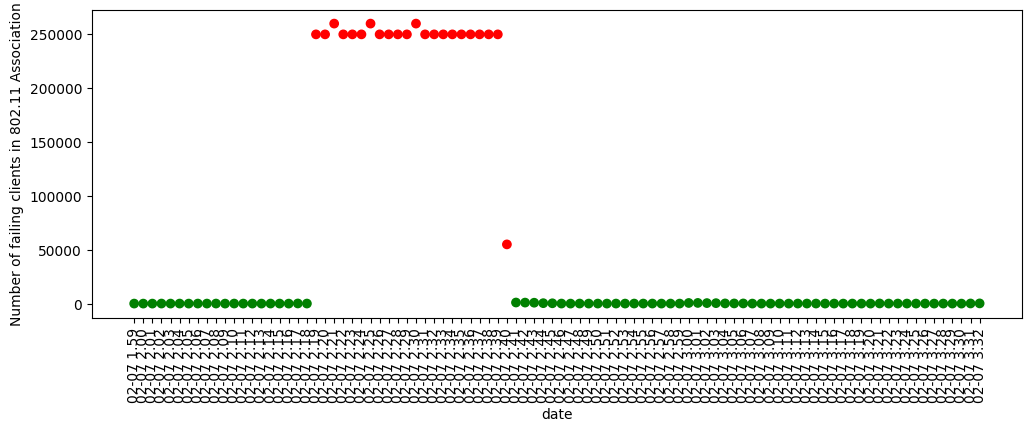

Lower threshold: -929.8750000000001, 
Upper threshold: 1906.125



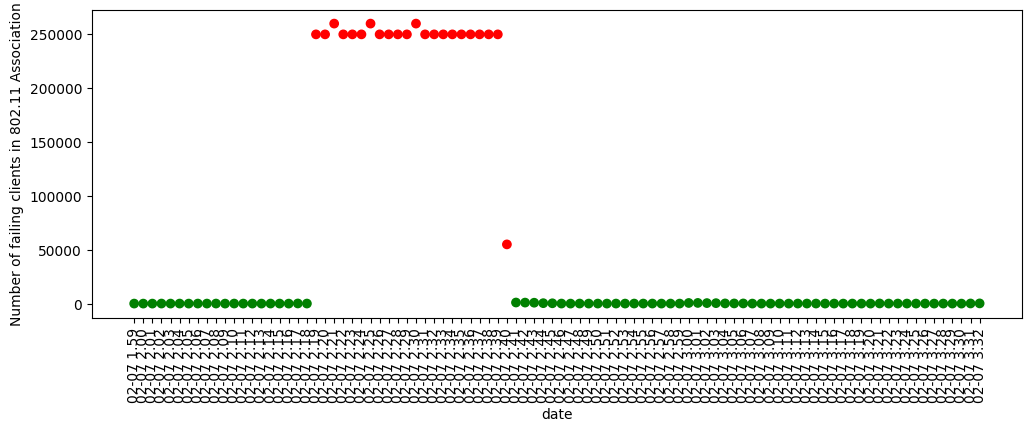

In [33]:
def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='Number of failing clients in 802.11 Association', threshold=1.1):
    
    df = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    df['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return df
  
iqr_df = iqr_anomaly_detector(data)
plot_anomalies(iqr_df)
# output
# Lower threshold: -2944.050000000003, 
# Upper threshold: 106441.55
iqr_df = iqr_anomaly_detector(data)
plot_anomalies(iqr_df)


Introduction to Anomaly Detection
An anomaly is an observation that deviates significantly from all the other observations. An anomaly detection system is a system that detects anomalies in the data. An anomaly is also called an outlier.

Example: Let’s say a column of data consists of the income of citizens per month and that column contains the salary of Bill Gates as well. Then the salary of Bill Gates is an outlier in this data.

Univariate Anomaly Detection image
Image Source
Anomaly Detection Algorithms
In this blog, let us go through the following anomaly detection algorithms.

Interquartile Range

Isolation Forest

Median Absolute Deviation

K-Nearest Neighbours

These are a few of the many algorithms available and never hold back yourself from exploring more algorithms other than these.

Import the required lib